# Python for deep learning

## Cell 12

```python
def getFeatureVectorsFromImage(image, n, reportInterval):    
    neighborsRange = range((-n//2)+1, (n//2)+1)
    height, width = image.shape
    neighborhood = np.zeros(n*n)
    neighborhoods = np.zeros((height*width, n*n), dtype=float)
    print("Extracting the feature vectors.")
    vectorIndex = 0
    for y in range(0, height):
        if y%reportInterval == 0:
            print("\rRow: " + str(y), end="")
        for x in range(0, width):
            featureIndex = 0
            for yRel in neighborsRange:
                for xRel in neighborsRange:
                    yRel = yRel if y+yRel >= 0 and y+yRel < height else -yRel
                    xRel = xRel if x+xRel >= 0 and x+xRel < width else -xRel
                    neighborhood[featureIndex] = image[y+yRel,x+xRel]
                    featureIndex += 1
            neighborhoods[vectorIndex] = neighborhood
            vectorIndex += 1
    print("", end="\n")
    return neighborhoods
```

In cell 12 we transform the input image into the input for the network, by extracting the intensity values in the neighborhood of each pixels.

## Creating a model with given weights, saving and loading of a model

We first need to have our trained model back. Here we just create an array of the weights from the output of the notebook. We will then create the network again and directly set the weights. This way we do not have to do the training again.
We could also save the model in the notebook and load it here. Which will be demonstrated below.

In [145]:
from numpy import array, float32
weights = [array([[-0.10027412,  0.24947888, -0.2141105 , -0.0042963 , -0.6876477 ,
          1.0647981 ,  0.79249066,  0.31624848],
        [-0.261808  ,  0.11034656, -0.3476799 , -0.12323102, -0.4462426 ,
          0.65622467,  0.28279844,  0.8410371 ],
        [-0.10062718, -0.35625634, -0.17707768,  0.02133632, -0.33283406,
          0.9915828 ,  0.3000889 ,  0.87376547],
        [-0.70565605,  0.14563847,  0.28225076, -0.5665982 , -0.06473186,
          0.6367087 ,  1.1338865 ,  0.6653829 ],
        [-0.51850814, -0.31873006, -0.57809675, -0.12006801, -0.8928453 ,
          0.9808985 ,  0.4428513 ,  1.1218145 ],
        [-0.3898023 , -0.1355547 ,  0.50832784,  0.12309319, -0.5325432 ,
          0.2711881 ,  0.8150395 ,  1.0505173 ],
        [-0.49858722, -0.29766494,  0.370215  , -0.4011116 , -0.5788222 ,
          0.76388305,  0.36969602,  0.6289859 ],
        [-0.06321262,  0.2861836 , -0.51202244,  0.1633696 , -1.0685657 ,
          0.39110044,  0.8943148 ,  0.6424107 ],
        [-0.16829152,  0.04549944, -0.20486042, -0.5833068 , -0.21379966,
          0.46119   ,  1.1473954 ,  0.8824302 ]], dtype=float32),
 array([ 1.8958102,  0.       ,  0.       ,  0.       ,  1.9346952,
        -1.8374935, -1.8268275, -1.9031916], dtype=float32),
 array([[-3.0798147 ],
        [ 0.6630801 ],
        [ 0.0370068 ],
        [-0.48225212],
        [-4.8848963 ],
        [ 3.7467735 ],
        [ 3.1386025 ],
        [ 2.5861793 ]], dtype=float32),
 array([-1.887786], dtype=float32)]

We need an array containing an array of the weights of the connections, followed by an array of biases for each layer.

In [146]:
weights1 = array([weights[0], weights[1]])
weights2 = array([weights[2], weights[3]])

When creating the layers we directly pass in the weights, using the keyword parameter weights.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


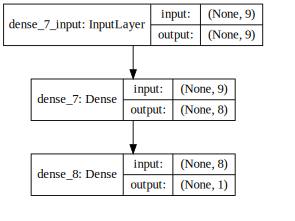

In [147]:
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import SVG
from keras.utils import model_to_dot
N=3
model = Sequential()
model.add(Dense(N*N-1, input_dim=(N*N), activation='relu', weights=weights1))
model.add(Dense(1, activation='sigmoid', weights=weights2))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [148]:
from pprint import pprint
pprint(model.get_weights())

[array([[-0.10027412,  0.24947888, -0.2141105 , -0.0042963 , -0.6876477 ,
         1.0647981 ,  0.79249066,  0.31624848],
       [-0.261808  ,  0.11034656, -0.3476799 , -0.12323102, -0.4462426 ,
         0.65622467,  0.28279844,  0.8410371 ],
       [-0.10062718, -0.35625634, -0.17707768,  0.02133632, -0.33283406,
         0.9915828 ,  0.3000889 ,  0.87376547],
       [-0.70565605,  0.14563847,  0.28225076, -0.5665982 , -0.06473186,
         0.6367087 ,  1.1338865 ,  0.6653829 ],
       [-0.51850814, -0.31873006, -0.57809675, -0.12006801, -0.8928453 ,
         0.9808985 ,  0.4428513 ,  1.1218145 ],
       [-0.3898023 , -0.1355547 ,  0.50832784,  0.12309319, -0.5325432 ,
         0.2711881 ,  0.8150395 ,  1.0505173 ],
       [-0.49858722, -0.29766494,  0.370215  , -0.4011116 , -0.5788222 ,
         0.76388305,  0.36969602,  0.6289859 ],
       [-0.06321262,  0.2861836 , -0.51202244,  0.1633696 , -1.0685657 ,
         0.39110044,  0.8943148 ,  0.6424107 ],
       [-0.16829152,  0.0454994

We do not need it here, but to show how it works, we save the model to disk, as a .h5 file and load it again.

In [149]:
model.save('simple-pixel-seg.h5')

In [150]:
from keras.models import load_model
model2 = load_model('simple-pixel-seg.h5')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [151]:
pprint(model2.get_weights())

[array([[-0.10027412,  0.24947888, -0.2141105 , -0.0042963 , -0.6876477 ,
         1.0647981 ,  0.79249066,  0.31624848],
       [-0.261808  ,  0.11034656, -0.3476799 , -0.12323102, -0.4462426 ,
         0.65622467,  0.28279844,  0.8410371 ],
       [-0.10062718, -0.35625634, -0.17707768,  0.02133632, -0.33283406,
         0.9915828 ,  0.3000889 ,  0.87376547],
       [-0.70565605,  0.14563847,  0.28225076, -0.5665982 , -0.06473186,
         0.6367087 ,  1.1338865 ,  0.6653829 ],
       [-0.51850814, -0.31873006, -0.57809675, -0.12006801, -0.8928453 ,
         0.9808985 ,  0.4428513 ,  1.1218145 ],
       [-0.3898023 , -0.1355547 ,  0.50832784,  0.12309319, -0.5325432 ,
         0.2711881 ,  0.8150395 ,  1.0505173 ],
       [-0.49858722, -0.29766494,  0.370215  , -0.4011116 , -0.5788222 ,
         0.76388305,  0.36969602,  0.6289859 ],
       [-0.06321262,  0.2861836 , -0.51202244,  0.1633696 , -1.0685657 ,
         0.39110044,  0.8943148 ,  0.6424107 ],
       [-0.16829152,  0.0454994

## Extracting the features from the image

We write a function that transforms the input image into the input format for our network. 

We iterate over the columns and rows of pixels in the image. For each pixel we retrieve the intensity values in its neighborhood and add them as a feature vector to our network input. However pixels at the border of the image do not have neighbors on one side (or on two sides for corners). For these neighbors that lie outside of the image, we use the mirrored values. If for example the pixel does not have a neighbor to its right, we use the value of its left neighbor instead.

In [187]:
def getFeatureVectorsFromImage(image, n, reportInterval):    
    neighborsRange = range((-n//2)+1, (n//2)+1)
    height, width = image.shape
    neighborhood = np.zeros(n*n)
    neighborhoods = np.zeros((height*width, n*n), dtype=float)
    print("Extracting the feature vectors.")
    vectorIndex = 0
    for y in range(0, height):
        if y%reportInterval == 0:
            print("\rRow: " + str(y), end="")
        for x in range(0, width):
            featureIndex = 0
            for yRel in neighborsRange:
                for xRel in neighborsRange:
                    yRel = yRel if y+yRel >= 0 and y+yRel < height else -yRel
                    xRel = xRel if x+xRel >= 0 and x+xRel < width else -xRel
                    neighborhood[featureIndex] = image[y+yRel,x+xRel]
                    featureIndex += 1
            neighborhoods[vectorIndex] = neighborhood
            vectorIndex += 1
    print("", end="\n")
    return neighborhoods

We test the function using a small random image.

In [192]:
import numpy as np
randomImage = np.random.rand(5, 5)
pprint(randomImage)
X = getFeatureVectorsFromImage(randomImage, 3, 1)
pprint(X[0].reshape(3,3))

array([[0.68351528, 0.27502207, 0.31219423, 0.11763504, 0.86099178],
       [0.17363823, 0.65398381, 0.17722023, 0.07507006, 0.76257609],
       [0.68921207, 0.72755837, 0.44203417, 0.53998276, 0.19623321],
       [0.03743573, 0.917668  , 0.41211213, 0.89874721, 0.90020166],
       [0.56284018, 0.41774483, 0.21183847, 0.70768041, 0.86292136]])
Extracting the feature vectors.
Row: 4
array([[0.65398381, 0.17363823, 0.65398381],
       [0.27502207, 0.68351528, 0.27502207],
       [0.65398381, 0.17363823, 0.65398381]])


You can see that the neighborhood of the first pixel, consists of the values to the right and bottom-side while the missing values to left and top are replaced by the values at the mirrored positions. 

In [189]:
pprint(X[6].reshape(3,3))

array([[0.9066144 , 0.12354669, 0.43453985],
       [0.58716886, 0.79516947, 0.52633879],
       [0.80921585, 0.59229423, 0.4052188 ]])


For the 6th pixel at the position (1, 1) all neighbors are within the image.